In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid')

### Load dataset

In [5]:
df=pd.read_csv(r"C:\Users\user\Desktop\for_analysis\Spotify.csv")

In [6]:
df

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [7]:
# delete Unnamed column because its not necessary
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


### Data cleaning

In [9]:
# check for missing values
df.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [11]:
df.shape

(2017, 16)

In [12]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

### Exploratory data analysis

#### Top 5 most popular artists

In [13]:
top_5_artists=df.groupby('artist').count().sort_values(by='song_title',ascending=False)['song_title'][:5]
top_5_artists

artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
Name: song_title, dtype: int64

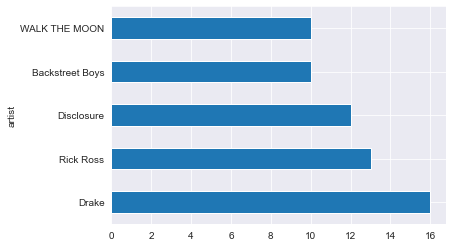

In [14]:
top_5_artists.plot.barh()
plt.show()

#### Top 5 loudest tracks

In [15]:
top_5_loudest=df[['loudness','song_title']].sort_values(by='loudness',ascending=True)[:5]
top_5_loudest

,loudness,song_title
1594,-33.097,"Lyric Pieces, Book I Op. 12: I. Arietta"
1596,-31.367,"8 Fantasiestücke, Op.12 : 1. Des Abends"
1598,-31.082,"Piano Quartet in E flat, Op.47: 3. Andante can..."
1531,-30.447,"I Was So Young, and You Were So Beautiful"
1549,-29.460,Eleanor


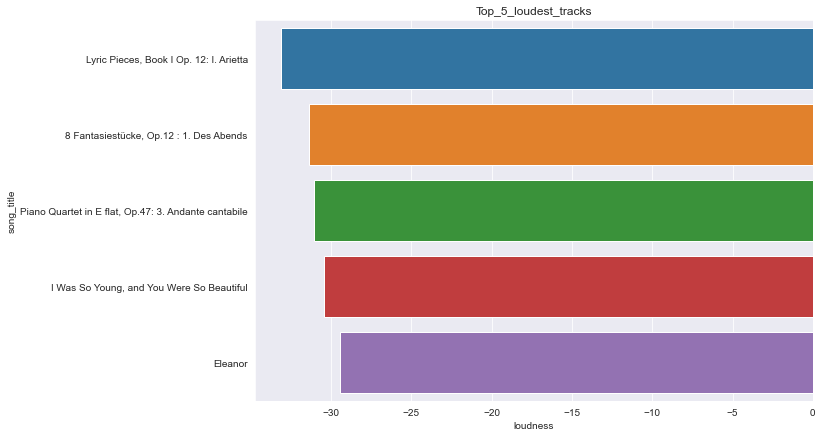

In [16]:
plt.figure(figsize=(10,7))
sns.barplot(x='loudness',y='song_title',data=top_5_loudest)
plt.title('Top_5_loudest_tracks')
plt.show()

#### Artist with the most danceability song

In [17]:
artist_danceability_song=df[['danceability','song_title','artist']].sort_values(by='danceability',ascending=False)[:5]
artist_danceability_song

,danceability,song_title,artist
1433,0.984,Flashwind - Radio Edit,Ben Remember
1901,0.967,SexyBack,Justin Timberlake
604,0.962,Check Me Out Like,Blaqstarr
32,0.959,Best Friend,Young Thug
1957,0.959,Ice Ice Baby,Vanilla Ice


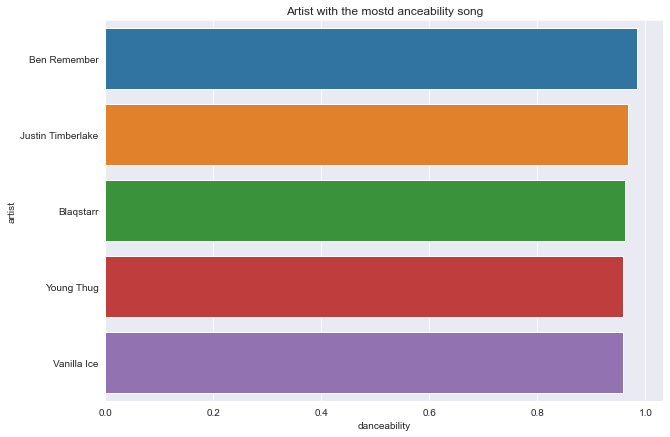

In [18]:
plt.figure(figsize=(10,7))
sns.barplot(x='danceability',y='artist',data=artist_danceability_song)
plt.title('Artist with the mostd anceability song')
plt.show()

In [19]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


#### Top 10 instrumental tracks

In [20]:
top_10_instrumentalness_tracks=df[['instrumentalness','song_title']].sort_values(by='instrumentalness',ascending=False)[:10]
top_10_instrumentalness_tracks

,instrumentalness,song_title
1313,0.976,Senseless Order
271,0.968,So Destroyed (channeling Rage Peace)
1575,0.964,A Hundred Dreams from Now
1619,0.958,Raven
725,0.957,Strandbar (disko)
1546,0.956,Almas vaggvisa
1322,0.955,Pitchblack
1349,0.954,Prismatic Abyss
1661,0.954,Yebisah
121,0.952,Chasing Heaven


#### Top 10 energetic tracks

In [21]:
top_10_energetic_tracks=df[['energy','song_title']].sort_values(by='energy',ascending=False)[:10]
top_10_energetic_tracks

,energy,song_title
1299,0.998,No Absolution
1322,0.997,Pitchblack
1297,0.994,A Darkened Gospel
1347,0.993,Unanswered
2015,0.992,First Contact
1680,0.992,Paranoia
1332,0.992,Beautiful Agony
1328,0.991,Down into the Abyss
1681,0.990,Hated
1296,0.990,Black Colors


 #### Most common duration

In [30]:
most_common=df['duration_ms'].value_counts().idxmax()
most_common

192000

#### Most popular artist

In [33]:
most_popular_artist=df['artist'].value_counts().idxmax()
most_popular_artist

'Drake'

#### Top 10 tracks with the most valence

In [35]:
most_valence=df[['valence','song_title']].sort_values(by='valence',ascending=False)[:10]
most_valence

,valence,song_title
460,0.992,Abataka - Original Mix
912,0.975,I'm Walkin' - 2002 Digital Remaster
1966,0.974,"To Roz Bikini (Itsy, Bitsy, Teenie, Weenie)"
207,0.973,Look at You
48,0.973,Azon de ma gnin kpevi
337,0.972,Let's Lovedance Tonight - Danny Krivit Re-edit...
1590,0.972,Jelly On A Plate
838,0.971,Let's Lovedance Tonight - Danny Krivit Re-edit...
497,0.968,Mi Swing es Tropical
112,0.967,Please Mr. Postman
